## Importing Important Libraries

In [163]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandasql as ps

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import math
from sklearn.model_selection import cross_val_score
from sklearn import set_config
set_config(display='diagram')
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
 

## Downloading Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data Exploration

#### Feature exploration

In [3]:
df.shape

(918, 12)

We have 918 columns and 13 rows in this set.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Feature details
**Age            :** Patient Age<br>
**Sex            :** Patient Gender *(**M:** Male, **F:** Female)*<br>
**ChestPainType  :** Patient Chest pain type *(**TA:** Typical Angina, **ATA:** Atypical Angina, **NAP:** Non-Anginal Pain, **ASY:** Asymptomatic)* <br>
**RestingBP      :** Patient Resting blood pressure *(mm Hg)* <br>
**Cholesterol    :** Patient Serum cholesterol *(mm/dl)* <br>
**FastingBS      :** Patient Fasting blood sugar *(**1:** FastingBS > 120 mg/dl, **0:** otherwise)* <br>
**RestingECG     :** Patient Resting electrocardiogram *(**Normal :** Normal, **ST:** having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]*<br>
**MaxHR          :** Maximum heart rate <br>
**ExerciseAngina :** Exercise angina *(**Y :** Yes, **N :** No)*<br>
**Oldpeak        :** ST depression induced by exercise relative to rest <br>
**ST_Slope       :** ST segment shift relative to exercise-induced increments in heart rate *(**Up :** upsloping, **Flat:** flat, **Down:** downsloping)* <br>
**HeartDisease   :** Heart Disease *(**1 :** heart disease, **0 :** Normal)* <br>

#### Feature data types

In [5]:
df.dtypes.value_counts()

int64      6
object     5
float64    1
dtype: int64

Here, we have 6 int type features, 5 object type features and 1 float type features

**Checking null values**

In [6]:
df.isnull().values.sum()

0

No null values are present in our data

#### Numerical Features

In [7]:
numerical_features=[]
for column in df.columns:
    if df[column].dtype=='int64' or df[column].dtype=='float64':
        numerical_features.append(column)

print(numerical_features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


#### Categorical Features

In [8]:
categorical_features = df.columns[df.dtypes=='object'].tolist()
print(categorical_features)
for column in categorical_features:
    print(column, ":", df[column].unique())

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingECG : ['Normal' 'ST' 'LVH']
ExerciseAngina : ['N' 'Y']
ST_Slope : ['Up' 'Flat' 'Down']


## Data Visualizations

**Numerical feature visualization**

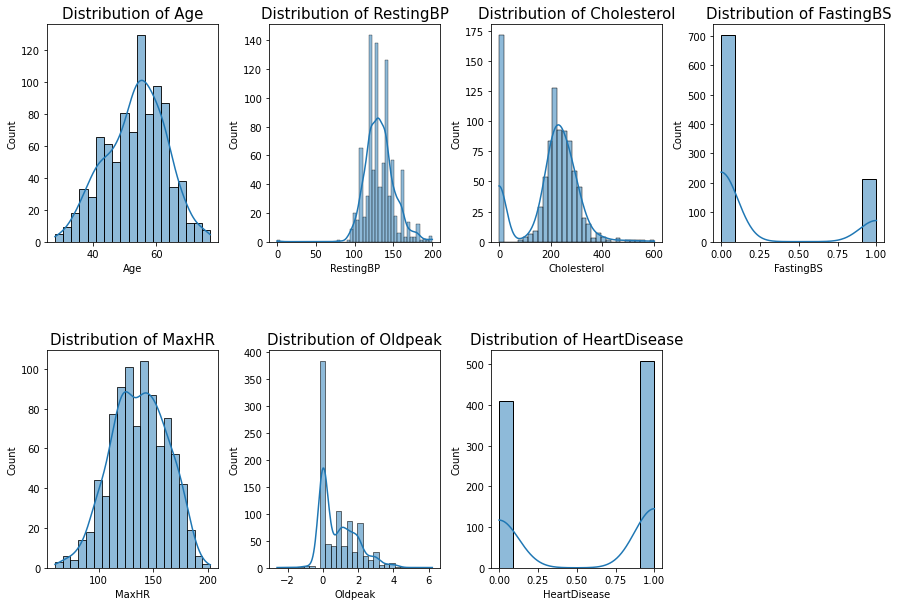

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (15,10))
axes = axes.flatten()

for col, ax in zip(numerical_features, axes):
    ax = sns.histplot(data = df, x = col, ax = ax, kde = True)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
axes[-1].axis('off')
plt.show()

Since Fasting BS has only two two values, we have to convert FastingBS data type from int to object.

In [10]:
categorical_features

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

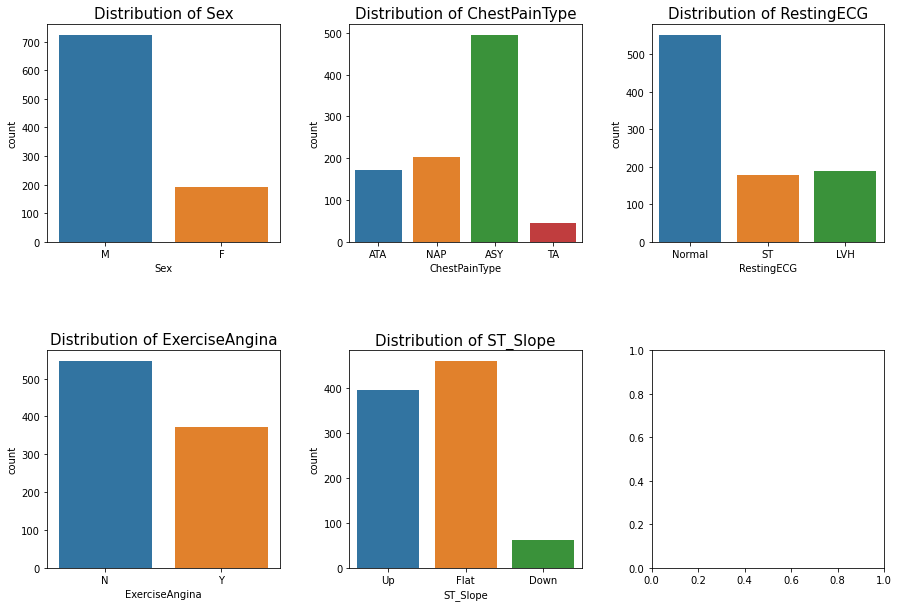

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 10))
axes = axes.flatten()

for col, ax in zip(categorical_features, axes):
    ax = sns.countplot(data = df, x = col, ax = ax)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
plt.show()

**Sex Vs Heart Disease**

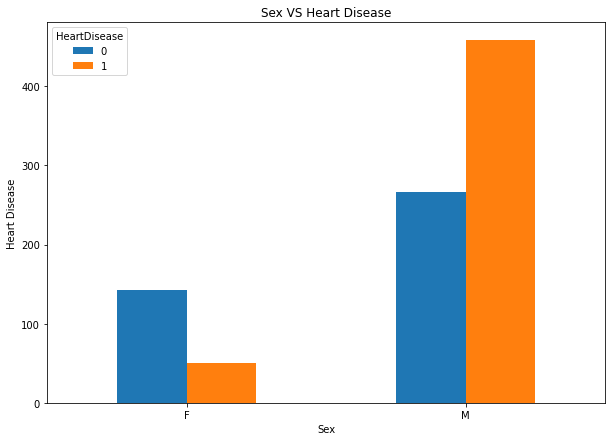

In [12]:
pd.crosstab(df['Sex'],df['HeartDisease']).plot(kind='bar',figsize=(10,7))
plt.xlabel("Sex")
plt.ylabel("Heart Disease")
plt.xticks(rotation=0)
plt.title("Sex VS Heart Disease")
plt.show()

Male patients suffering more from heart disease than Female Patients, since population can be the reason for ths observation  malbeacause es are more in numbers than females in our data.

**Heart Disease Vs Age**

In [13]:
print("Minimum age for heart failure :", df.Age.min())
print("Maximum age for heart failure :", df.Age.max())


Minimum age for heart failure : 28
Maximum age for heart failure : 77


Text(0.5, 1.0, 'Heart Disease vs Age')

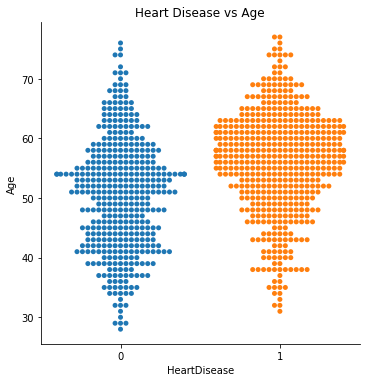

In [14]:
sns.catplot(x="HeartDisease", y="Age", hue="HeartDisease", kind="swarm", data=df)
plt.title("Heart Disease vs Age")

From the above plot, Age range between 55-65 suffering more from heart disease

*Creating another column as Age Bucket were Age of patient ranging from 1-75+*

In [15]:
df1 = ps.sqldf("""

SELECT 
    Age,
    CASE WHEN df.Age IS NULL THEN '0. Missing'
        WHEN df.Age <25 THEN '1-25'
        WHEN df.Age <30 THEN '25-30'
        WHEN df.Age <35 THEN '30-35'
        WHEN df.Age <40 THEN '35-40'
        WHEN df.Age <45 THEN '40-45'
        WHEN df.Age <50 THEN '45-50'
        WHEN df.Age <55 THEN '50-55'
        WHEN df.Age <60 THEN '55-60'
        WHEN df.Age <65 THEN '60-65'
        WHEN df.Age <70 THEN '65-70'
        WHEN df.Age <75 THEN '70-75'
        ELSE '75+' END AS age_bucket
FROM df     
""")

In [16]:
Age_Bucket = df1.drop(columns='Age')
df['Age_Bucket'] = Age_Bucket

In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Bucket
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,40-45
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,45-50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,35-40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,45-50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,50-55


**Agebucket Vs Heart Disease**

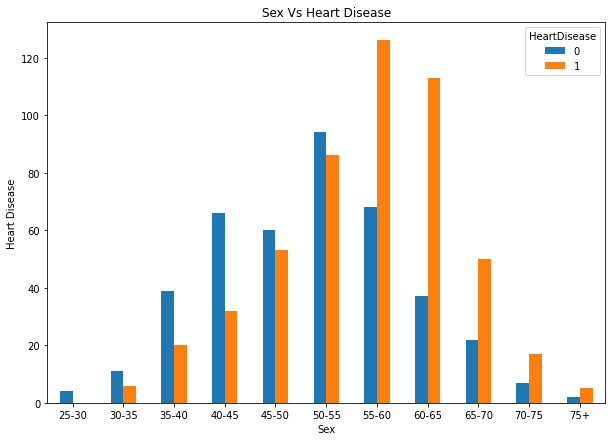

In [18]:
pd.crosstab(df['Age_Bucket'],df['HeartDisease']).plot(kind='bar',figsize=(10,7))
plt.xlabel("Sex")
plt.ylabel("Heart Disease")
plt.title("Sex Vs Heart Disease")
plt.xticks(rotation=0)
plt.show()

As we can see from the above plot, age ranges from 50-65 are suffering more from heart disease.

**Agebucket Vs Sex Vs Heart Disease**

<AxesSubplot:xlabel='Age_Bucket'>

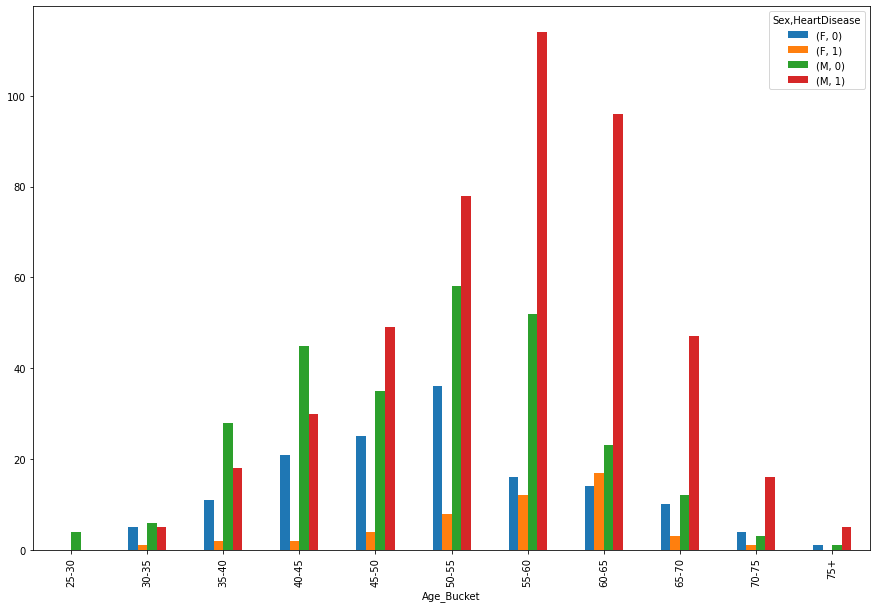

In [19]:
pd.crosstab(df['Age_Bucket'],[df['Sex'],df['HeartDisease']]).plot(kind="bar",figsize=(15,10))

As we can wee from the  above plot, males are dominating in heat disease and with the age range from 50-65.

**Chestpain Type Vs Heart Disease**

<AxesSubplot:xlabel='ChestPainType'>

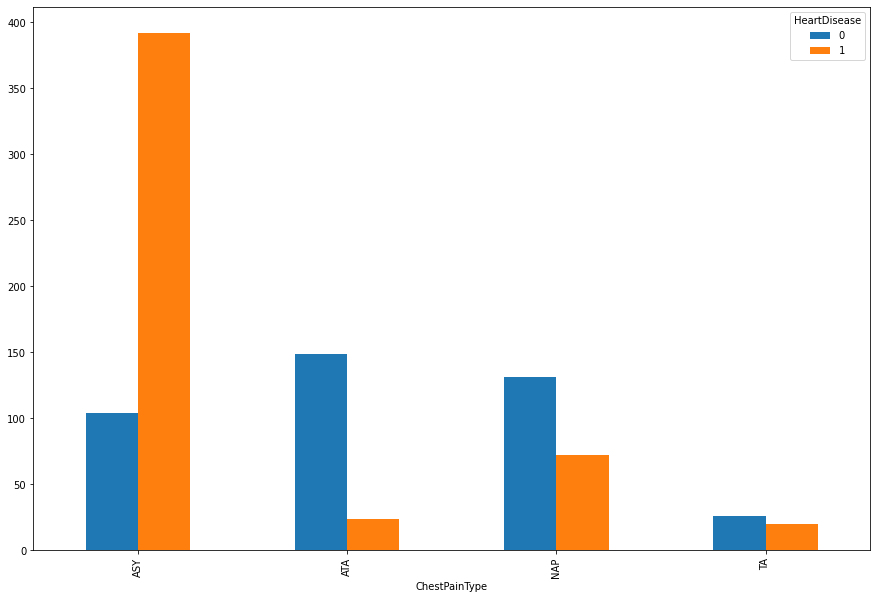

In [20]:
pd.crosstab(df['ChestPainType'],[df['HeartDisease']]).plot(kind="bar",figsize=(15,10))

ASY (Asymptomatic) chestpaint patients are dominating here 

**Heart Disease Vs Resting BP**

C:\Users\wazid\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wazid\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


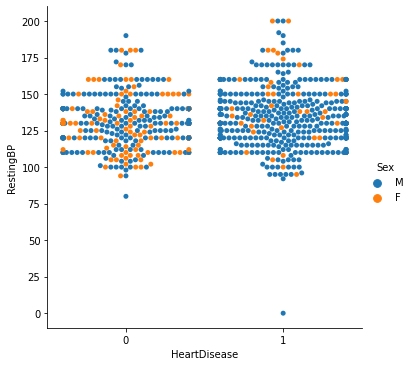

In [21]:
sns.catplot(x="HeartDisease", y="RestingBP", hue="Sex", kind="swarm", data=df)

RestingBP of Males ranging from 110-160 dominating

**Hearti Disease Vs Cholesterol**

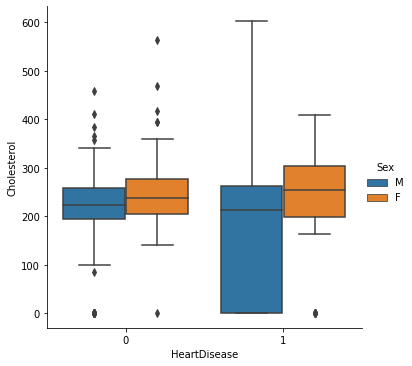

In [22]:
sns.catplot(x="HeartDisease", y="Cholesterol", hue='Sex',kind="box", data=df)

**FastingBS Vs Heart Disease**

<AxesSubplot:xlabel='FastingBS'>

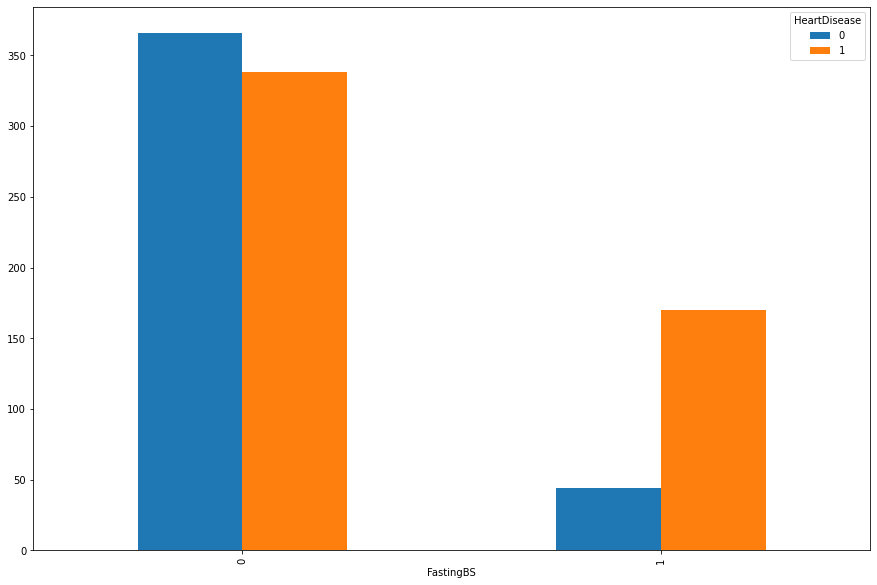

In [23]:
pd.crosstab(df['FastingBS'],[df['HeartDisease']]).plot(kind="bar",figsize=(15,10))

Fasting BS 0 : (FastingBS > 120 mg/dl) suffering more from heart disease.

**RestingECG Vs Heart Disease**

<AxesSubplot:xlabel='HeartDisease'>

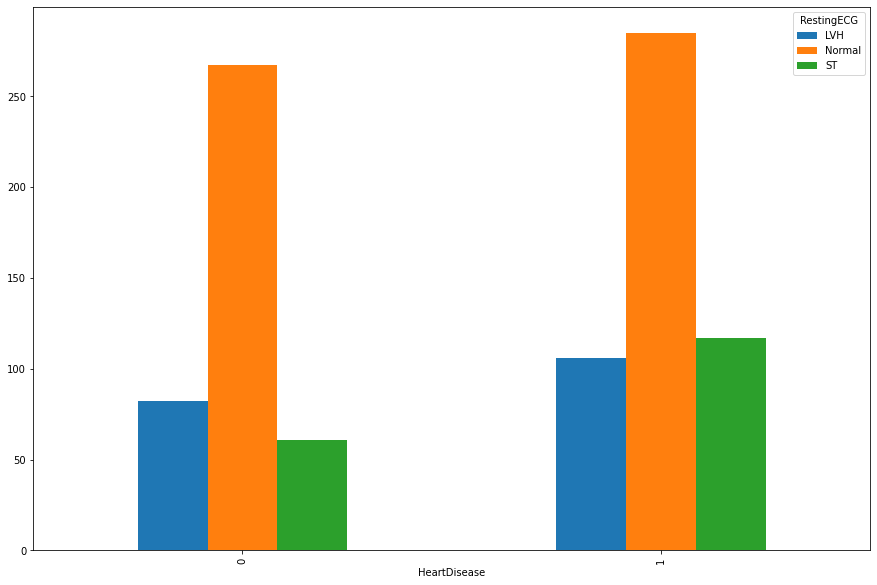

In [24]:
pd.crosstab(df['HeartDisease'],[df['RestingECG']]).plot(kind="bar",figsize=(15,10))

Normal ECG patients are suffering more from Heart Disease

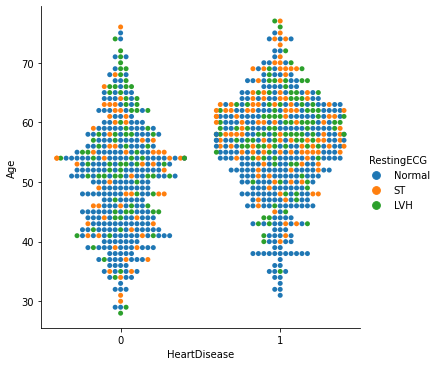

In [25]:
sns.catplot(x="HeartDisease", y="Age", hue="RestingECG", kind="swarm", data=df)

From the above plot, we can see that the distribution of blue dots are more than other dots.

In [26]:
fig = px.scatter(df, 
                 x=df['Age'], 
                 y=df['RestingBP'], 
                 color=df['HeartDisease'], 
                 facet_col=df.FastingBS,
                 facet_row=df.Sex,
                 width=1500, 
                 height=900)


fig.show()

## Model Preparation

In [27]:
df.drop(columns=['Age_Bucket'],inplace=True)

#### Splititng data into training and test set

In [28]:
X = df.iloc[:,:-1]
y = df['HeartDisease']

#### Splititng data into training and test set

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Shape of our Train and test Data

In [30]:
print(" DEPENDENT VRIABLE")
print(" Training set  size : ", X_train.shape)
print(" Test set size      : ", X_test.shape)

print(" INDEPENDENT VARIABLE")
print(" Training set  size : ", y_train.shape)
print(" Test set size      : ", y_test.shape)

 DEPENDENT VRIABLE
 Training set  size :  (734, 11)
 Test set size      :  (184, 11)
 INDEPENDENT VARIABLE
 Training set  size :  (734,)
 Test set size      :  (184,)


In [31]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### Encoding categorical features

In [32]:
ohe = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,6,8,10])
],remainder='passthrough')

In [33]:
sc = ColumnTransformer([
    ('sc',StandardScaler(),slice(0,20))
])

In [34]:
pipe = Pipeline([
    ('ohe',ohe),
    ('sc',sc)
])

In [35]:
train = pipe.fit_transform(X_train)
test = pipe.fit_transform(X_test)

#### Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(train,y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(test)
print(" Accuracy of Logistic Regression :",round(accuracy_score(y_pred,y_test)*100,2),"%")

 Accuracy of Logistic Regression : 85.87 %


In [38]:
confusion_matrix(y_test,y_pred)

array([[67, 10],
       [16, 91]], dtype=int64)

#### K Nearest Neighbour 

In [73]:
k = int(math.sqrt(df.shape[0]))

In [74]:
knn = KNeighborsClassifier(k)
knn.fit(train,y_train)
y_pred1 = knn.predict(test)
print(" Accuracy of K Nearest Neighbour :",round(accuracy_score(y_pred1,y_test)*100,2),"%")

 Accuracy of K Nearest Neighbour : 84.78 %


In [75]:
confusion_matrix(y_test,y_pred1)

array([[65, 12],
       [16, 91]], dtype=int64)

In [76]:
error_train = []
error_test = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train,y_train)
    x1 = confusion_matrix(y_train,knn.predict(train))
    x2 = confusion_matrix(y_test,knn.predict(test))
    error_train.append((x1[0][1]+x1[1][0]/x1.sum()))
    error_test.append((x2[0][1]+x2[1][0]/x2.sum()))

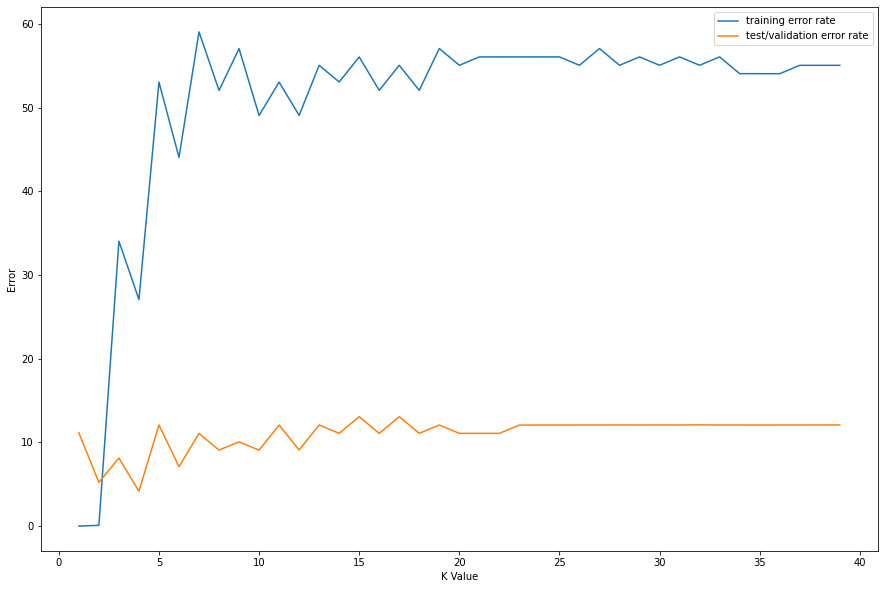

In [77]:
plt.figure(figsize=(15,10))
plt.plot(range(1,40),error_train,label='training error rate')
plt.plot(range(1,40),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

#### Support Vector Machine

In [90]:
svm = SVC()
svm.fit(train,y_train)
y_pred2 = svm.predict(test)
print(" Support Vector Machine :",round(accuracy_score(y_pred2,y_test)*100,2),"%")

 Support Vector Machine : 88.59 %


#### Decision Tree

In [57]:
dt = DecisionTreeClassifier()
dt.fit(train,y_train)
y_pred3 = dt.predict(test)
print(" Accuracy of Decision Tree :",round(accuracy_score(y_pred3,y_test)*100,2),"%")

 Accuracy of Decision Tree : 80.98 %


#### Random Forest

In [84]:
rf = RandomForestClassifier()
rf.fit(train,y_train)
y_pred4 = rf.predict(test)
print(" Accuracy of Random Forest :",round(accuracy_score(y_pred4,y_test)*100,2),"%")

 Accuracy of Random Forest : 88.04 %


#### Cross validation method

In [118]:
X_new = pipe.fit_transform(X)

In [122]:
X_new.shape

(918, 20)

In [108]:
estimators = [('Logistic Regression',lr),('K Nearest Neighbours',knn),
              ('Support Vector Machine',svm),('Decision Tree',dt),
              ('Random Forest',rf)]

In [123]:
print("USING CROSS VALIDATION")
print("________________________________________________________________________________________")
for estimator in estimators:
    x_1 = cross_val_score(estimator[1],X_new,y,cv=10,scoring='accuracy')
    print(estimator[0],"score : ",np.round(np.mean(x_1),2),"%")

USING CROSS VALIDATION
________________________________________________________________________________________
Logistic Regression score :  0.85 %
K Nearest Neighbours score :  0.86 %
Support Vector Machine score :  0.85 %
Decision Tree score :  0.78 %
Random Forest score :  0.86 %


### Voting Ensemble Technique

#### Hard Voting

In [125]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x_2 = cross_val_score(vc,X_new,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x_2),2))

0.86


In [129]:
from sklearn.datasets import make_classification


svm1 = SVC(probability=True, degree=1)
svm2 = SVC(probability=True, degree=2)
svm3 = SVC(probability=True, degree=3)
svm4 = SVC(probability=True, degree=4)
svm5 = SVC(probability=True, degree=5)

estimators_1 = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators_1:
    x_3 = cross_val_score(estimator[1],X_new,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x_3),2))

svm1 0.85
svm2 0.85
svm3 0.85
svm4 0.85
svm5 0.85


In [131]:
vc1 = VotingClassifier(estimators=estimators_1,voting='soft')
x_4 = cross_val_score(vc1,X_new,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x_4),2))

0.85


### Gradient boosting ensemble technique

In [148]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate,random_state=0)
    gb_clf.fit(train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(test, y_test)))

Learning rate:  0.05
Accuracy score (validation): 0.886
Learning rate:  0.075
Accuracy score (validation): 0.880
Learning rate:  0.1
Accuracy score (validation): 0.880
Learning rate:  0.25
Accuracy score (validation): 0.902
Learning rate:  0.5
Accuracy score (validation): 0.875
Learning rate:  0.75
Accuracy score (validation): 0.864
Learning rate:  1
Accuracy score (validation): 0.864


In [166]:
data = [
        ['Logistic Regression   ','85.87%','85%','default'],
        ['K Nearest Neighbour   ','84.78%','86%','K=30   '],
        ['Support Vector Machine','88.59%','85%','default'],
        ['Decision Tree         ','80.98%','78%','default'],
        ['Random Forest         ','88.04%','86%','default'],
        ['Voting Ensemble       ', '     ','86%','Hard   '],
        ['Gradient boosting     ','90.2%' ,'   ','learning rate = 0.5']
        ]
df3 = pd.DataFrame(data, columns = ['ALGORITHM','ACCURACY ON TEST DATA','CROSS VALIDATION','CONDITIONS APPLIED'])

In [167]:
#df3.set_index(df3.columns[0],inplace=True)

In [168]:
df3

,ALGORITHM,ACCURACY ON TEST DATA,CROSS VALIDATION,CONDITIONS APPLIED
0,Logistic Regression,85.87%,85%,default
1,K Nearest Neighbour,84.78%,86%,K=30
2,Support Vector Machine,88.59%,85%,default
3,Decision Tree,80.98%,78%,default
4,Random Forest,88.04%,86%,default
5,Voting Ensemble,,86%,Hard
6,Gradient boosting,90.2%,,learning rate = 0.5


In [199]:
fig = go.Figure(data=[go.Table(
                                 header=dict(
                                              values=list(df3.columns), 
                                              line_color='white',  
                                              fill_color='Black',
                                              height=30, 
                                              font=dict(color='white', size=12),
                                             ), cells=dict(values=[
                                                     df3['ALGORITHM'] , 
                                                     df3['ACCURACY ON TEST DATA'], 
                                                     df3['CROSS VALIDATION'],
                                                     df3['CONDITIONS APPLIED'], 
                                                     ],line_color='white', 
                                            fill_color='lightgrey', 
                                            align='left'  
                                           )
                               )
                     ]
               )

fig.update_layout(width=800, height=400)
fig.show()
             